<a href="https://colab.research.google.com/github/ManishSahani24/Quantum-Information-and-Computing/blob/main/1st%20step%20in%20Quantum%20Computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Create a Bell-State Circuit

In [ ]:
!pip install qiskit
!pip install qiskit_ibm_runtime
!pip install qiskit_aer

In [4]:
!pip install matplotlib numpy pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=0f5d0e1c1e97eec3d6632e1f9c4481adde9318cf1479b387379efe4da2f848f1
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import qiskit, qiskit_ibm_runtime, qiskit_aer

In [6]:
!pip show qiskit

Name: qiskit
Version: 2.2.3
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: dill, numpy, rustworkx, scipy, stevedore, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime


In [7]:
!pip show qiskit_ibm_runtime

Name: qiskit-ibm-runtime
Version: 0.43.1
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: 
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: ibm-platform-services, numpy, packaging, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3
Required-by: 


In [7]:
from qiskit import QuantumCircuit

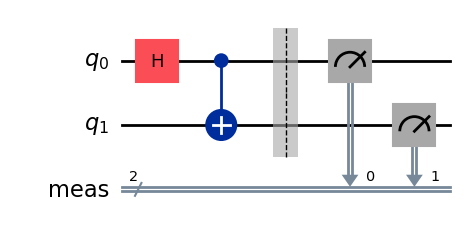

In [9]:
qc = QuantumCircuit(2)   #quantum circuit having two qubits.
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw('mpl')


In [10]:
from qiskit_aer import AerSimulator
sim = AerSimulator()
job = sim.run(qc, shots= 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 528, '00': 496}




---


---




$|0⟩$ and $|1⟩$ forms the basis state of Qubits. They are the quantum equivalent of the classical state 0 and 1 respectively.

The quantum bit or qubit can be in the $LC$ of these two basis states, which is given by:

  $|\psi⟩$ $=$ $\sqrt{1-p}|0⟩$ $+$ $e^{i\phi}$ $\sqrt{p}$ $|1⟩$

  where,


  $\sqrt{1-p}$ and $\sqrt{p}$ are the amplitude of the probabilities.

* If we were to measure the state of this qubit, we would find the result $1$ with probability $p$ and $0$ with probability $1-p$.

* $\phi$ indicates the **relative quantum phase** between the two states $|0⟩$ and $|1⟩$.In Quantum mechanics, the "global phase" is not physically measurable.

In simple words, the superposition of both this state can be written as:

  
$|\psi⟩$ $=$ $\alpha |0⟩$ $+$ $\beta$ $|1⟩$

where,

$\alpha$ and $\beta$ are the probability amplitudes.

${\alpha}^2$ and ${\beta}^2$ are the probabilities with which the qubit occurs in state $|0⟩$ and $|1⟩$.



In [12]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_distribution

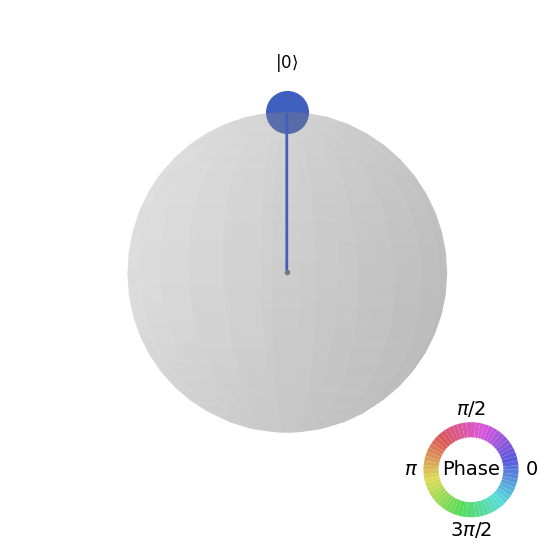

In [13]:
#visualize |0> on a qsphere
sv=Statevector([1, 0])
plot_state_qsphere(sv)

`statevector[1,0]` - It represent the amplitudes of the quantum state.

* The first entry (index 0) corresponds to the amplitude of state $|0⟩$.

* The second entry (index 1) corresponds to the amplitude of the state $|1⟩$.

##### The Q-sphere is similar to the Bloch sphere.

* The North Pole represents the state $|0\rangle$.

* The South Pole represents the state $|1\rangle$.

* It plots a vector (or point) on the sphere's surface corresponding to the state.

* The color of the vector indicates its phase.

* The size of the point indicates the probability of that basis state.

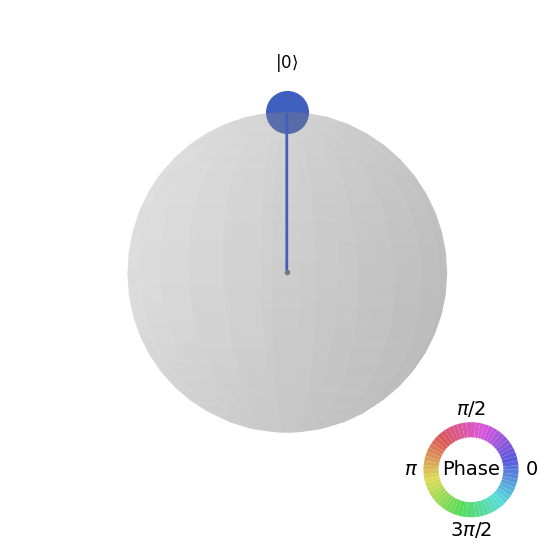

In [14]:
qc1 = QuantumCircuit(1)
sv = Statevector(qc1)
plot_state_qsphere(qc1)




---


Another way to show Qsphere is by using the Quantum circuit.

`qc = QuantumCircuit(1)` - This create an empty quantum circuit. **1** specifies that this circuit should have one qubit.

When a quantum circuit is created, all its qubits are automatically initialized in the $|0\rangle$ state by default.



---


Now, let us initialize a superposition quantum state with phase $Φ$ $=$ 0 and $p$ $=$ $1/2$ .

In other words:

$|$Ψ$⟩$ $=$ $\frac{1}{\sqrt{2}}|0⟩$ $+$ $\frac{1}{\sqrt{2}}|1⟩$

Meaning the equal likelihood of measuring both $0$ and $1$.

***Note also that The size of the circles at the two points is smaller than when we had simply for $|0⟩$. This is because the size of the circles is proportional to the probability of measuring each one, which is now reduced by half.***

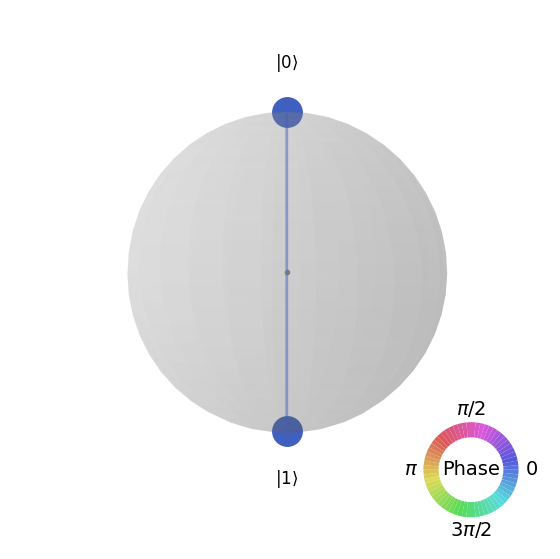

In [21]:
import math as m
sv = Statevector([1/m.sqrt(2), 1/m.sqrt(2)])
plot_state_qsphere(sv)
